In [33]:
G_path = '/Users/sepehrbe/My_Drive/DataSources/SkinCare'
G_saved = G_path+ '/Saved/'
G_Grid = G_path+ '/Saved/Grid_Search'
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import torch.nn.functional as F
from CNN_NETs import CNN_Nets
pd.options.display.max_colwidth = 300

def plot_grid_results(model_):
    epochs_X = [i for i in range(1, len( list(model_['train_epoch_loss'])[0]) +1)]
    plt.subplots(figsize=(6,4))
    plt.plot(epochs_X , list(model_.train_epoch_loss)[0] , 'bo-', label='Train loss')
    plt.plot(epochs_X , list(model_.valid_epoch_loss)[0],'ro-', label='Validation loss')
    plt.plot(epochs_X , list(model_.test_epoch_loss)[0],'go-', label='Test loss')
    plt.xlabel("Epochs", fontsize = 12)
    plt.ylabel("Loss", fontsize = 12)
    plt.grid()
    plt.legend()
    plt.title('Train and Validation loss by epochs')
    plt.show()
    plt.plot(epochs_X , list(model_.train_epoch_acc)[0] , 'bo-', label='Train Accuracy')
    plt.plot(epochs_X , list(model_.valid_epoch_acc)[0] ,'ro-', label='Validation Accuracy')
    plt.plot(epochs_X , list(model_.test_epoch_acc)[0] ,'go-', label='Test Accuracy')
    plt.xlabel("Epochs", fontsize = 12)
    plt.ylabel("Accuracy", fontsize = 12)
    plt.grid()
    plt.legend()
    plt.title('Train and Validation Accuracy by epochs')
    plt.show()


In [34]:
files = list(os.listdir(G_Grid))
files

['AtuoEncoder_20_Jun_2022_18-17.pkl',
 '.DS_Store',
 'Icon\r',
 'AtuoEncoder_20_Jun_2022_06-48.pkl',
 'AtuoEncoder_20_Jun_2022_00-25.csv',
 'AtuoEncoder_20_Jun_2022_06-48.csv',
 '280x210_19_Jun_2022_02_51.csv',
 'AtuoEncoder_20_Jun_2022_18-17.csv']

In [35]:
# f = "AtuoEncoder_20_Jun_2022_06-48.pkl"
f = '280x210_19_Jun_2022_02_51.csv'
f = 'AtuoEncoder_20_Jun_2022_18-17.pkl'

try: GridSrach = pickle.load(open(G_Grid + '/' + f , 'rb'))
except: GridSrach = pd.read_csv(G_Grid + '/' + f)
GridSrach.sort_values('test_accuracy', ascending=False, inplace=True)

Hyper params:      {'LR': 0.01, 'Momentum': 0.7, 'Net': <class 'CNN_NETs.CNN_Nets.Net8'>, 'batch_size': 24, 'epochs': 60, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'weight_decay': 1e-06}
Name: hyper_param, dtype: object
test_accuracy Acc:  0.6683046683046683
Avg.Test recall:  0.6525293584006768
Balanced test Recall :  0.5523809523809524


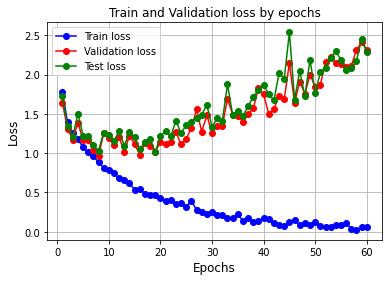

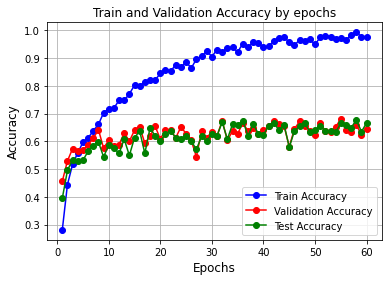

Hyper params:      {'LR': 0.001, 'Momentum': 0.9, 'Net': <class 'CNN_NETs.CNN_Nets.Net8'>, 'batch_size': 24, 'epochs': 60, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'weight_decay': 0}
Name: hyper_param, dtype: object
test_accuracy Acc:  0.6658476658476659
Avg.Test recall:  0.6171024510786082
Balanced test Recall :  0.580952380952381


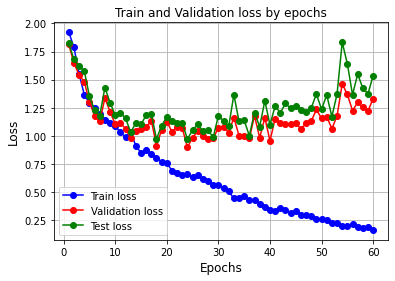

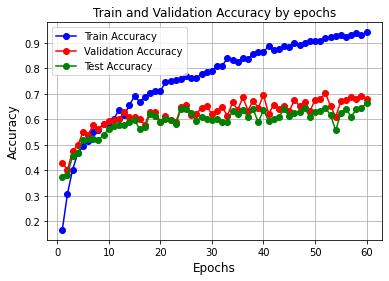

Hyper params:      {'LR': 0.001, 'Momentum': 0.9, 'Net': <class 'CNN_NETs.CNN_Nets.Net8'>, 'batch_size': 24, 'epochs': 60, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'weight_decay': 1e-06}
Name: hyper_param, dtype: object
test_accuracy Acc:  0.6584766584766585
Avg.Test recall:  0.6435412631625815
Balanced test Recall :  0.5714285714285714


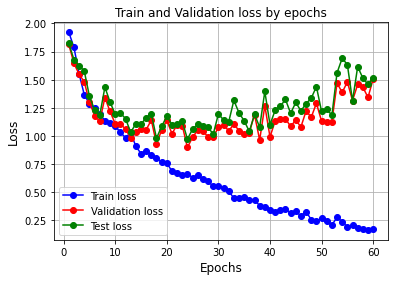

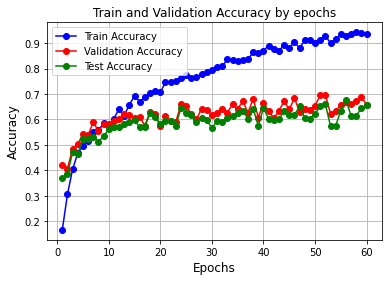

Hyper params:      {'LR': 0.01, 'Momentum': 0.7, 'Net': <class 'CNN_NETs.CNN_Nets.Net8'>, 'batch_size': 24, 'epochs': 60, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'weight_decay': 0}
Name: hyper_param, dtype: object
test_accuracy Acc:  0.6388206388206388
Avg.Test recall:  0.5844714653042143
Balanced test Recall :  0.5428571428571429


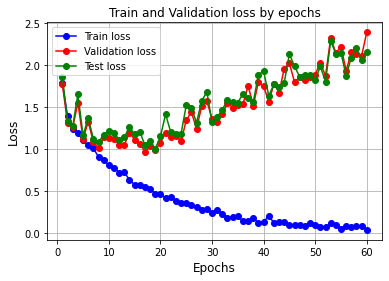

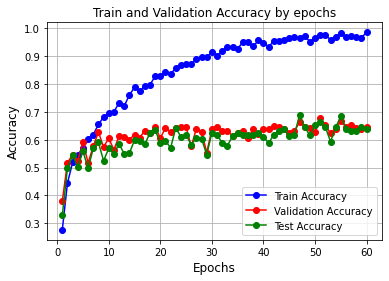

Hyper params:      {'LR': 0.01, 'Momentum': 0.7, 'Net': <class 'CNN_NETs.CNN_Nets.Net8'>, 'batch_size': 24, 'epochs': 60, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'weight_decay': 0.001}
Name: hyper_param, dtype: object
test_accuracy Acc:  0.6240786240786241
Avg.Test recall:  0.6319219595271488
Balanced test Recall :  0.5238095238095237


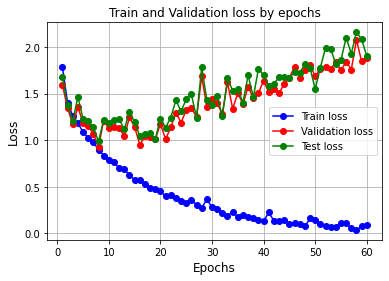

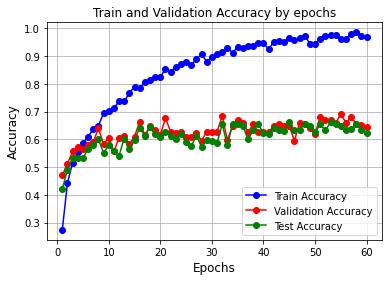

Hyper params:      {'LR': 0.01, 'Momentum': 0.9, 'Net': <class 'CNN_NETs.CNN_Nets.Net8'>, 'batch_size': 24, 'epochs': 60, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'weight_decay': 1e-06}
Name: hyper_param, dtype: object
test_accuracy Acc:  0.6191646191646192
Avg.Test recall:  0.5631331118235046
Balanced test Recall :  0.4761904761904762


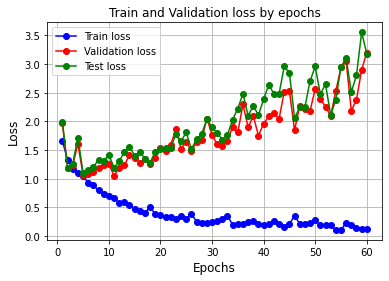

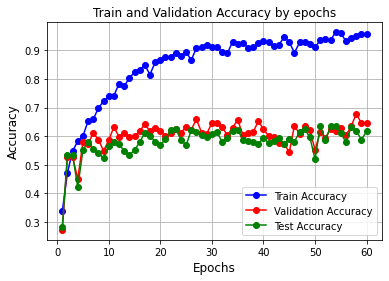

Hyper params:      {'LR': 0.001, 'Momentum': 0.9, 'Net': <class 'CNN_NETs.CNN_Nets.Net8'>, 'batch_size': 24, 'epochs': 60, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'weight_decay': 0.001}
Name: hyper_param, dtype: object
test_accuracy Acc:  0.6167076167076168
Avg.Test recall:  0.6153666878158462
Balanced test Recall :  0.5428571428571429


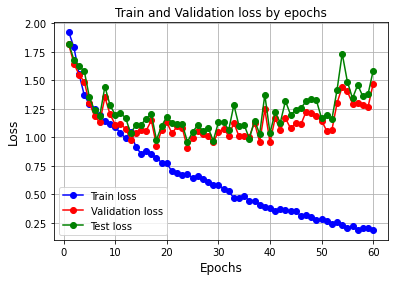

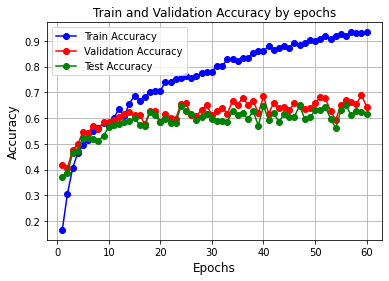

Hyper params:      {'LR': 0.01, 'Momentum': 0.9, 'Net': <class 'CNN_NETs.CNN_Nets.Net8'>, 'batch_size': 24, 'epochs': 60, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'weight_decay': 0}
Name: hyper_param, dtype: object
test_accuracy Acc:  0.6093366093366094
Avg.Test recall:  0.5285975589394243
Balanced test Recall :  0.4857142857142857


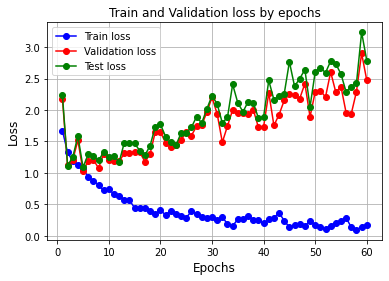

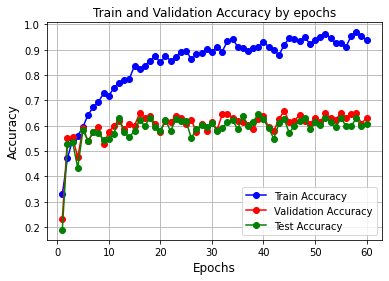

Hyper params:      {'LR': 0.01, 'Momentum': 0.9, 'Net': <class 'CNN_NETs.CNN_Nets.Net8'>, 'batch_size': 24, 'epochs': 60, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'weight_decay': 0.001}
Name: hyper_param, dtype: object
test_accuracy Acc:  0.6044226044226044
Avg.Test recall:  0.5545879805872793
Balanced test Recall :  0.5238095238095238


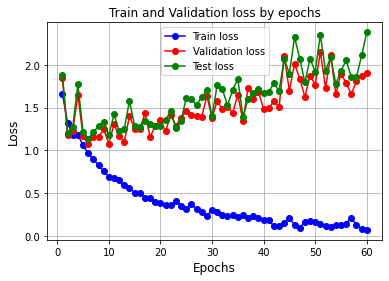

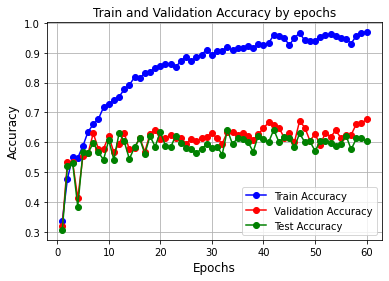

Hyper params:      {'LR': 0.001, 'Momentum': 0.7, 'Net': <class 'CNN_NETs.CNN_Nets.Net8'>, 'batch_size': 24, 'epochs': 60, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'weight_decay': 1e-06}
Name: hyper_param, dtype: object
test_accuracy Acc:  0.601965601965602
Avg.Test recall:  0.5886903927068723
Balanced test Recall :  0.5238095238095238


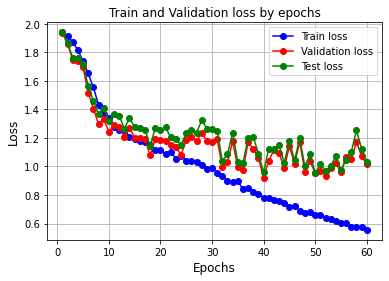

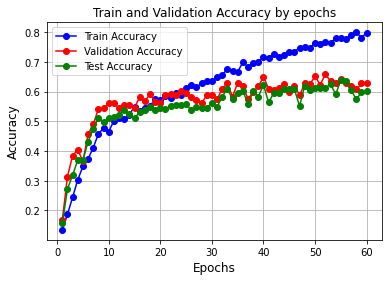

Hyper params:      {'LR': 0.001, 'Momentum': 0.7, 'Net': <class 'CNN_NETs.CNN_Nets.Net8'>, 'batch_size': 24, 'epochs': 60, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'weight_decay': 0.001}
Name: hyper_param, dtype: object
test_accuracy Acc:  0.5995085995085995
Avg.Test recall:  0.5842261069925866
Balanced test Recall :  0.5238095238095238


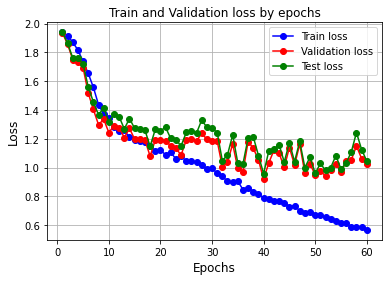

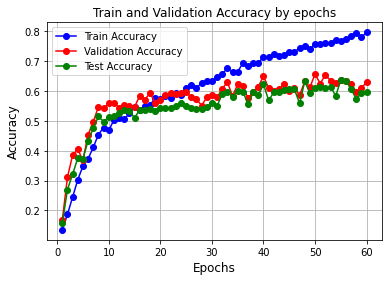

Hyper params:      {'LR': 0.001, 'Momentum': 0.7, 'Net': <class 'CNN_NETs.CNN_Nets.Net8'>, 'batch_size': 24, 'epochs': 60, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'weight_decay': 0}
Name: hyper_param, dtype: object
test_accuracy Acc:  0.5847665847665847
Avg.Test recall:  0.582925321133596
Balanced test Recall :  0.5428571428571428


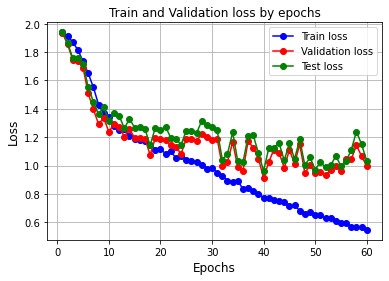

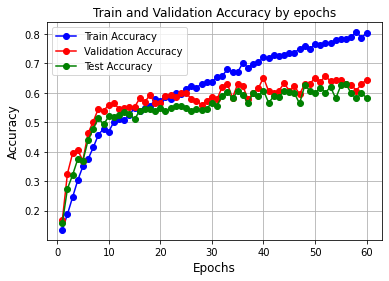

Hyper params:      {'LR': 0.0001, 'Momentum': 0.9, 'Net': <class 'CNN_NETs.CNN_Nets.Net8'>, 'batch_size': 24, 'epochs': 60, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'weight_decay': 0}
Name: hyper_param, dtype: object
test_accuracy Acc:  0.5184275184275184
Avg.Test recall:  0.5477578808522006
Balanced test Recall :  0.5523809523809524


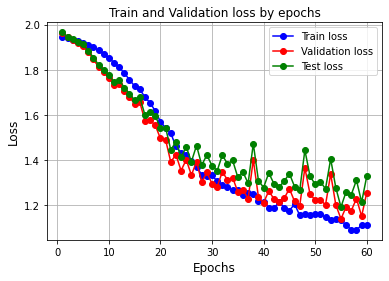

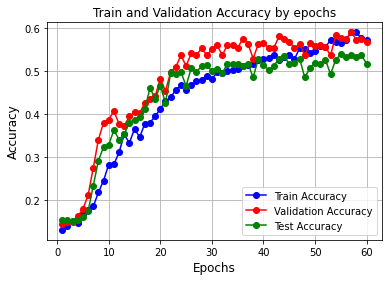

Hyper params:      {'LR': 0.0001, 'Momentum': 0.9, 'Net': <class 'CNN_NETs.CNN_Nets.Net8'>, 'batch_size': 24, 'epochs': 60, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'weight_decay': 0.001}
Name: hyper_param, dtype: object
test_accuracy Acc:  0.515970515970516
Avg.Test recall:  0.541546700727977
Balanced test Recall :  0.5333333333333333


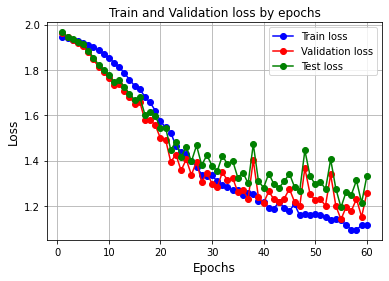

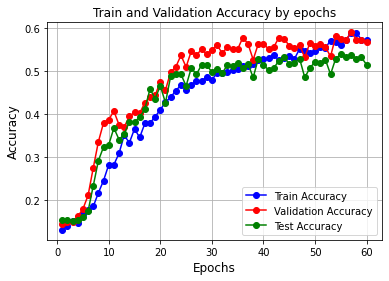

Hyper params:      {'LR': 0.0001, 'Momentum': 0.9, 'Net': <class 'CNN_NETs.CNN_Nets.Net8'>, 'batch_size': 24, 'epochs': 60, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'weight_decay': 1e-06}
Name: hyper_param, dtype: object
test_accuracy Acc:  0.5135135135135135
Avg.Test recall:  0.5392425532625392
Balanced test Recall :  0.5523809523809524


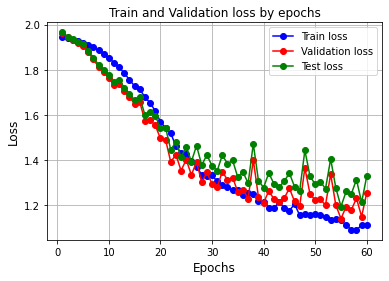

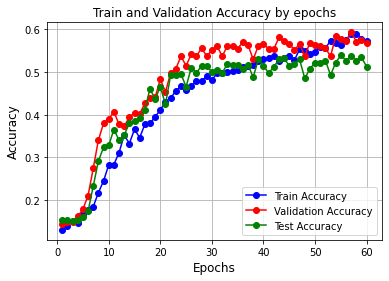

Hyper params:      {'LR': 0.0001, 'Momentum': 0.7, 'Net': <class 'CNN_NETs.CNN_Nets.Net8'>, 'batch_size': 24, 'epochs': 60, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'weight_decay': 0}
Name: hyper_param, dtype: object
test_accuracy Acc:  0.43243243243243246
Avg.Test recall:  0.37909570560341954
Balanced test Recall :  0.38095238095238093


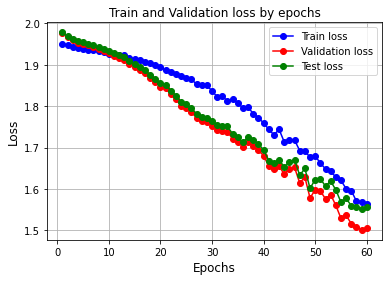

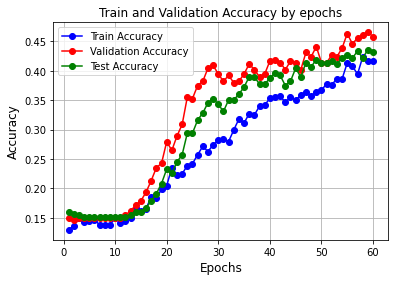

Hyper params:      {'LR': 0.0001, 'Momentum': 0.7, 'Net': <class 'CNN_NETs.CNN_Nets.Net8'>, 'batch_size': 24, 'epochs': 60, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'weight_decay': 1e-06}
Name: hyper_param, dtype: object
test_accuracy Acc:  0.43243243243243246
Avg.Test recall:  0.37909570560341954
Balanced test Recall :  0.38095238095238093


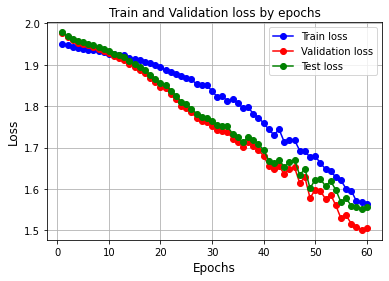

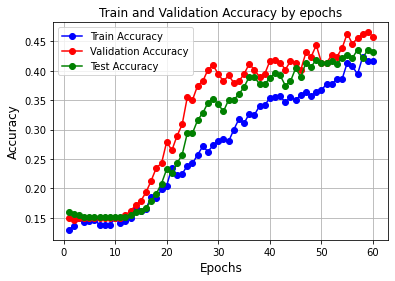

Hyper params:      {'LR': 0.0001, 'Momentum': 0.7, 'Net': <class 'CNN_NETs.CNN_Nets.Net8'>, 'batch_size': 24, 'epochs': 60, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'weight_decay': 0.001}
Name: hyper_param, dtype: object
test_accuracy Acc:  0.4275184275184275
Avg.Test recall:  0.3763972929050068
Balanced test Recall :  0.38095238095238093


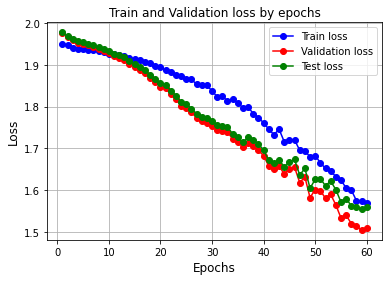

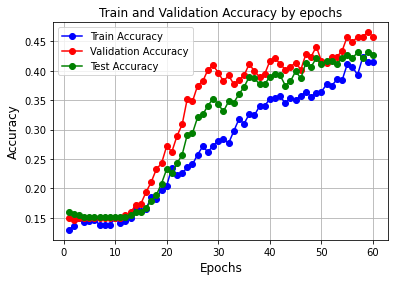

IndexError: positional indexers are out-of-bounds

In [38]:
n = [0,1,2,3,4]
n = range(100)
for i in n:
    details_ = GridSrach.iloc[[i]]
    print('Hyper params: ', details_.hyper_param.iloc[[0]])
    print('test_accuracy Acc: ', details_.test_accuracy[0])
    print('Avg.Test recall: ', details_.test_recall[0])
    print('Balanced test Recall : ', details_.blc_test_recall[0])
    plot_grid_results(details_)

In [26]:
len(details_.train_epoch_loss.iloc[0])

1017